In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.utils.layer_utils import count_params
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#%matplotlib inline

In [2]:
import os
os. chdir("C:/Users/samfr/PycharmProjects/upg/datasets")
print(os.getcwd())

C:\Users\samfr\PycharmProjects\upg\datasets


In [3]:
train_path = '/Users/samfr/PycharmProjects/upg/datasets/train'
valid_path = '/Users/samfr/PycharmProjects/upg/datasets/valid'
test_path = '/Users/samfr/PycharmProjects/upg/datasets/test'

In [4]:
train_batches = ImageDataGenerator(rescale=None,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(directory=train_path, 
                            target_size=(224,224), 
                            classes=['COVID-19','NORMAL','Viral_Pneumonia'], 
                            batch_size=10)

Found 2721 images belonging to 3 classes.


In [5]:
valid_batches = ImageDataGenerator(rescale=None,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(directory=valid_path, 
                            target_size=(224,224), 
                            classes=['COVID-19','NORMAL','Viral_Pneumonia'], 
                            batch_size=10)

Found 583 images belonging to 3 classes.


In [6]:
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224), classes=['COVID-19','NORMAL','Viral_Pneumonia'], batch_size=10)

Found 582 images belonging to 3 classes.


In [7]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

In [8]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)
for layer in resnet.layers:
    layer.trainable = False
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(resnet.output)
# Add a fully connected with 1,024 hidden units and ReLU activation
x = layers.Dense(1024,activation = "relu")(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation = "softmax")(x)

model = Model(resnet.input, x)

In [10]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
# from keras.models import Sequential
# from keras import optimizers
# model = Sequential()
# model.add(restnet)
# model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
# model.add(Dropout(0.3))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='softmax'))
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

filepath = "three_classification_problem_model_solved_Resnet50.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

results = model.fit_generator(generator=train_batches, steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=50, verbose=2,callbacks = callbacks_list)
#model.save('three_classification_problem_model_solved_Resnet50.h5')

C:\Users\samfr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
4/4 - 18s - loss: 192.0068 - accuracy: 0.5000 - val_loss: 187.8913 - val_accuracy: 0.4000

Epoch 00001: val_accuracy improved from -inf to 0.40000, saving model to three_classification_problem_model_solved_Resnet50.h5
Epoch 2/50
4/4 - 14s - loss: 182.5720 - accuracy: 0.4500 - val_loss: 27.4524 - val_accuracy: 0.7750

Epoch 00002: val_accuracy improved from 0.40000 to 0.77500, saving model to three_classification_problem_model_solved_Resnet50.h5
Epoch 3/50
4/4 - 13s - loss: 32.5050 - accuracy: 0.7500 - val_loss: 94.0759 - val_accuracy: 0.7500

Epoch 00003: val_accuracy did not improve from 0.77500
Epoch 4/50
4/4 - 13s - loss: 19.2646 - accuracy: 0.8750 - val_loss: 5.5165 - val_accuracy: 0.9750

Epoch 00004: val_accuracy improved from 0.77500 to 0.97500, saving model to three_classification_problem_model_solved_Resnet50.h5
Epoch 5/50
4/4 - 13s - loss: 24.3472 - accuracy: 0.8750 - val_loss: 30.0858 - val_accuracy: 0.8250

Epoch 00005: val_accuracy did not improve from 0.97500
E

### Let's plot the performance of Deep Learning model

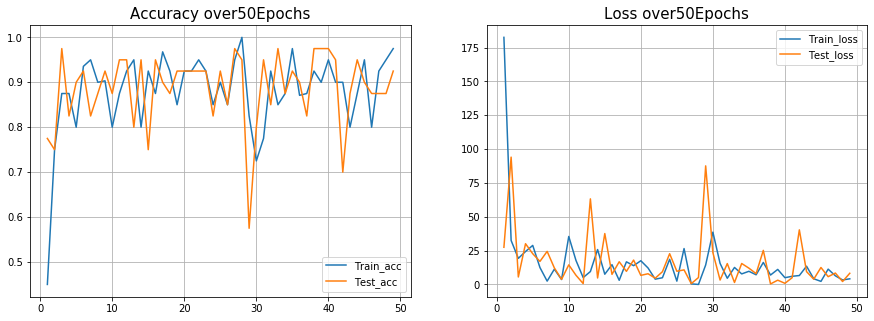

In [13]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 50)

# Let's create the Confusion Matrix

In [7]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from keras.preprocessing.image import img_to_array, load_img

In [8]:
# images folder
covid_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\COVID-19'
normal_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\NORMAL'
pneumonia_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\Viral_Pneumonia'

# path to model
model_path = '/Users/samfr/PycharmProjects/upg/datasets/three_classification_problem_model_solved_Resnet50.h5'

# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model_loaded = load_model(model_path)
model_loaded.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#######################################################
## COVID-19
# load all images into a list
images_covid = []
for img in os.listdir(covid_path):
    img = os.path.join(covid_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_covid.append(img)
    
    # stack up images list to pass for prediction
images_covid = np.vstack(images_covid)
covid_pred = model_loaded.predict(images_covid, batch_size=10)
covid_pred = np.argmax(covid_pred,axis=1)
covid_len = (len(list(covid_pred)))
covid_len

180

In [10]:
##########################################################
##  NORMAL
# load all images into a list
images_normal = []
for img in os.listdir(normal_path):
    img = os.path.join(normal_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_normal.append(img)
    
    # stack up images list to pass for prediction
images_normal = np.vstack(images_normal)
normal_pred = model_loaded.predict(images_normal, batch_size=10)
normal_pred = np.argmax(normal_pred,axis=1)
normal_len = (len(list(normal_pred)))
normal_len

201

In [11]:
############################################################
## Pneumonia
# load all images into a list
images_pneumonia = []
for img in os.listdir(pneumonia_path):
    img = os.path.join(pneumonia_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_pneumonia.append(img)
    
    # stack up images list to pass for prediction
images_pneumonia = np.vstack(images_pneumonia)
pneumonia_pred = model_loaded.predict(images_pneumonia, batch_size=10)
pneumonia_pred = np.argmax(pneumonia_pred,axis=1)
pneumonia_len = (len(list(pneumonia_pred)))
pneumonia_len

202

In [12]:
covid_true = np.zeros((covid_len,), dtype=int)
normal_true = np.ones((normal_len,), dtype=int)
pneumonia_true = 2*np.ones((pneumonia_len,), dtype=int)

In [13]:
type(pneumonia_true)

numpy.ndarray

In [14]:
type(pneumonia_pred)

numpy.ndarray

In [15]:
pred_concat = np.concatenate((covid_pred, normal_pred,pneumonia_pred), axis=0)

In [16]:
true_concat = np.concatenate((covid_true, normal_true,pneumonia_true), axis=0)

In [17]:
import sklearn.metrics as metrics

confusion_matrix(true_concat, pred_concat)
print('Classification Report')
target_names = ['COVID-19','NORMAL','Viral_Pneumonia']
print(metrics.classification_report(true_concat, pred_concat, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

       COVID-19       0.97      0.97      0.97       180
         NORMAL       0.76      0.98      0.85       201
Viral_Pneumonia       0.99      0.70      0.82       202

       accuracy                           0.88       583
      macro avg       0.91      0.88      0.88       583
   weighted avg       0.90      0.88      0.88       583



## Let's plot ROC & AUC

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


all_labels = ['COVID-19','NORMAL','Viral_Pneumonia']

y_test = true_concat
y_pred = pred_concat

0.9112939614997595

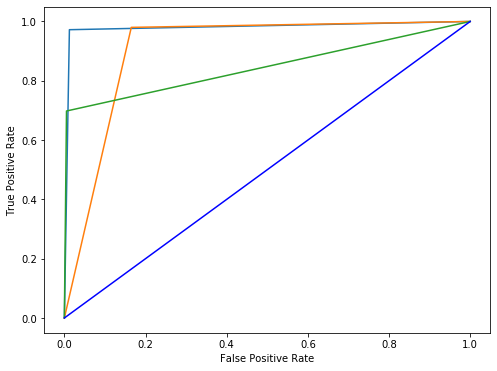

In [19]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (8, 6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
#true_concat.reset() # resetting generator
# y_pred = model.predict_generator(y_test, verbose = True)
# y_pred = np.argmax(y_pred, axis=1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
multiclass_roc_auc_score(y_test, y_pred)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from plot_conf_matr import plot_confusion_matrix

In [43]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix")
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.tight_layout()
        plt.savefig(figname)
    


Confusion matrix


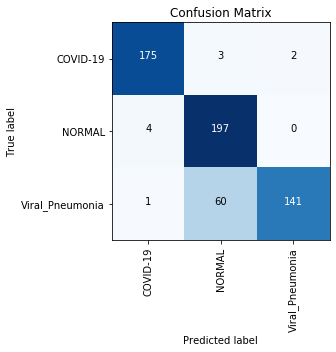

In [44]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['COVID-19','NORMAL','Viral_Pneumonia'], title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')

# Prediction (New Data)

Test Dataset has been kept untouched and used below to test model performance on unseen data

## Covid-19 Prediction Accuracy

In [21]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

In [22]:
# image folder
covid_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\COVID-19'
# path to model
model_path = '/Users/samfr/PycharmProjects/upg/datasets/three_classification_problem_model_solved_Resnet50.h5'

# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model = load_model(model_path)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(covid_path):
    img = os.path.join(covid_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
    # stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)

In [23]:
classes = np.argmax(classes,axis=1)

print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
# Let's convert it to List
pred_counter = list(classes)
print(pred_counter)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
# Let's check the accuracy od Covid-19

from collections import Counter

covid_occurance= Counter(pred_counter)[0]
covid_pred_accuracy = (covid_occurance/len(pred_counter))*100

print(covid_pred_accuracy)

96.66666666666667


## Normal Prediction Accuracy

In [26]:
# image folder
normal_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\NORMAL'
# path to model
model_path = '/Users/samfr/PycharmProjects/upg/datasets/three_classification_problem_model_solved_Resnet50.h5'

# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model = load_model(model_path)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(normal_path):
    img = os.path.join(normal_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
    # stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
# Let's convert it to List
pred_counter = list(classes)
#print(pred_counter)

In [28]:
# Let's check the accuracy of Normal patients

from collections import Counter

normal_occurance = Counter(pred_counter)[1]
normal_pred_accuracy = (normal_occurance/len(pred_counter))*100

print(normal_pred_accuracy)

100.0


## Viral Pneumonia Prediction Accuracy

In [29]:
# image folder
pneumonia_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\Viral_Pneumonia'
# path to model
model_path = '/Users/samfr/PycharmProjects/upg/datasets/three_classification_problem_model_solved_Resnet50.h5'

# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model = load_model(model_path)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(pneumonia_path):
    img = os.path.join(pneumonia_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
    # stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print(classes)

[1 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 2 1 2 2 2 2 2 2
 2 2 1 2 1 1 1 1 2 2 2 1 1 2 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 1 2 1 2 2 1 2
 1 2 2 1 2 2 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 1 1
 1 1 2 2 2 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 1 1 1 1 1
 2 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2]


In [30]:
# Let's convert it to List
pred_counter = list(classes)
print(pred_counter)

[1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2]


In [31]:
# Let's check the accuracy of Viral Pneumonia

from collections import Counter

pneumonia_occurance = Counter(pred_counter)[2]
pneumonia_pred_accuracy = (pneumonia_occurance/len(pred_counter))*100

print(pneumonia_pred_accuracy)

59.70149253731343
